# Name: Simon

# Project 1 

#### Title : Horizontal Attraction

#### Idea / Concept / Inspiration : Hiroshi Kawana

#### Method : Image Processing, Morphological Operations, Noise creation


In [1]:
from IPython.display import Image
from IPython.core.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import random
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy

## inspiration image:

In [2]:
Image(url= "http://dada.compart-bremen.de/imageUploads/medium/1_hk_d_1_4.jpg")

In [3]:
# define kernels for raster processing

# horizontal kernel
kernel_hor = np.array([[0, 0, 0],
                       [1, 1, 1],
                       [0, 0, 0]]).astype(np.uint8)


# vertical kernel
kernel_ver = np.array([[0, 1, 0],
                       [0, 1, 0],
                       [0, 1, 0]]).astype(np.uint8)



In [4]:
class Raster():
    """
    2d array
    """
    
    def __init__(self, n_rows, n_cols, n_val):
        # create raster image with random values
        self.n_val = n_val
        self.raster = np.random.randint(self.n_val, size=(n_rows, n_cols))
        
        # Cast as 8-bit ints, 0 and 255.
        self.bitmap = self.raster.astype(np.uint8) * int(255/(self.n_val-1))
        
        self.shape = self.raster.shape
        
    def display(self, grid, size):
        
        plt.figure(figsize = (size, size))
        plt.imshow(grid)
        
    def erode(self, grid, kernel, iterations):
        self.erosion = cv.erode(grid, kernel, iterations = iterations)
        
        
    def dilate(self, grid, kernel, iterations):
        self.dilation = cv.dilate(grid, kernel, iterations = iterations) 

In [5]:
def create_raster_colors(raster):
    # get dimensions of image
    i, j = raster.shape

    # create new empty matrix/image for color assignment
    var = np.zeros((i,j,4),dtype=float)

    # fill in every pixel with color assignment
    for x in range(i):
        for y in range(j):
            value = raster[x,y]
            if value == 0:
                var[x,y] = np.array([52/255,103/255,248/255,1])
            elif value == 63:
                var[x,y] = np.array([217/255,41/255,26/255,1])  
            elif value == 126:
                var[x,y] = np.array([250/255,240/255,238/255,1]) 
            elif value == 189:
                var[x,y] = np.array([3/255,10/255,10/255,1]) 
            else:
                var[x,y] = np.array([245/255,203/255,29/255,1])
    
    return var

In [6]:
@interact(erosion_iter = widgets.IntSlider(min = 0, max = 6, step = 1, value = 1),
         dilation_iter = widgets.IntSlider(min = 0, max = 6, step = 1, value = 3))

def create_art(erosion_iter, dilation_iter):
    grid = Raster(250,250,5)

    grid.erode(grid.bitmap, kernel_ver, erosion_iter)

    # dilation
    grid.dilate(grid.erosion, kernel_hor, dilation_iter)

    grid_colored = create_raster_colors(grid.dilation)

    # create fig size and plot image
    plt.figure(figsize = (10, 10))
    plt.axis('off')
    plt.imshow(grid_colored)

interactive(children=(IntSlider(value=1, description='erosion_iter', max=6), IntSlider(value=3, description='d…

# Project 2

### Title : $1,000,000

#### Idea / Concept / Inspiration : Roman Verostko

#### Method : B-Spline exploration, gaussian distribution

### inspiration image:

In [13]:
Image(url= "https://digitalartarchive.siggraph.org/wp-content/uploads/2017/02/1993_Verostko_Pathway.jpg", width=500, height=500)

In [8]:
from scipy import interpolate

In [9]:
def normal_splines(density):
    normal_x = np.append(np.append(np.random.normal(0, 50., density),np.random.normal(0, 50., density)), 
                         np.random.normal(0, 50., density))
    normal_y = np.append(np.append(np.random.normal(100, 50., density), np.random.normal(0, 50., density)), 
                         np.random.normal(-100, 50., density))



    bsplines = []
    for x,y in zip(normal_x, normal_y):
        plist = [i for i in zip(np.random.randint(x-5,x+5, size=(7)), np.random.randint(y-5,y+5, size=(7)))]

        ctr =np.array(plist)

        x=ctr[:,0]
        y=ctr[:,1]

        l=len(x)
        t=np.linspace(0,1,l-2,endpoint=True)
        t=np.append([0,0,0],t)
        t=np.append(t,[1,1,1])

        tck=[t,[x,y],3]

        u3=np.linspace(0,1,(max(l*2,70)),endpoint=True)

        out = scipy.interpolate.splev(u3,tck)
        bsplines.append(out)
        
    return bsplines
    

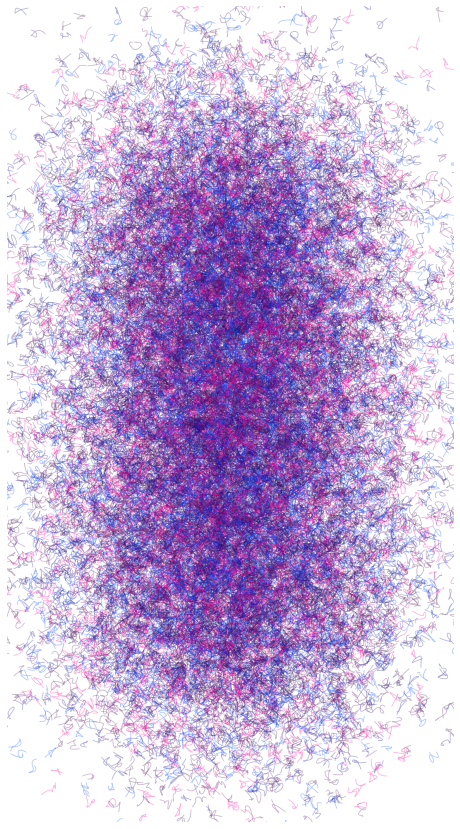

In [10]:
b_splines = normal_splines(density=9000)

# figure size
plt.figure(figsize = (8, 15))

# set limit of axis
plt.xlim(-130, 130)
plt.ylim(-240, 240)

colors = [(3/255, 74/255, 252/255,0.3), 
          (11/255, 9/255, 143/255,0.3), 
          (252/255, 3/255, 152/255,0.3), 
          (100/255, 17/255, 107/255,0.3),
          (63/255, 18/255, 84/255, 0.3),
          (40/255, 22/255, 48/255, 0.3)]

for i in b_splines:
    plt.plot(i[0],i[1],color=colors[random.randint(0, 4)],linewidth=0.8)

plt.axis('off')
plt.show()

# Play around to create random curve:

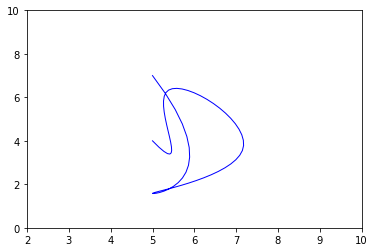

In [11]:
plist = [i for i in zip(np.random.randint(1,10, size=(7)), np.random.randint(1,10, size=(7)))]

ctr =np.array(plist)

x=ctr[:,0]
y=ctr[:,1]

l=len(x)
t=np.linspace(0,1,l-2,endpoint=True)
t=np.append([0,0,0],t)
t=np.append(t,[1,1,1])

tck=[t,[x,y],3]

u3=np.linspace(0,1,(max(l*2,70)),endpoint=True)

out = scipy.interpolate.splev(u3,tck)

#plt.plot(x,y,'k--',label='Control polygon',marker='o',markerfacecolor='red')
plt.plot(out[0],out[1],'b',linewidth=1.0)
plt.axis([min(x)-1, max(x)+1, min(y)-1, max(y)+1])
plt.show()